# EDA ANALYSIS FOR THE DATASET

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# LOADING THE DATASET

In [2]:
data=pd.read_excel(r"C:\Users\pc\OneDrive\Desktop\REDWINE DATASET.xlsx")


# SHAPE OF DATASET.

In [3]:
data.shape # BY THIS WE CAN FIND THE TOTAL NUMBER OF SAMPLES AND INDEPNEDENT FEATURES IN THE DATA SET.

(1599, 12)

# EXPLORING THE FEATURES AND DATAPOINT.


In [4]:
data.head() # THIS WE ARE DOING SO THAT WE CAN SEE THE DATASET IN TABULAR FORMAT AND EXPLORE THE INDPENDENT FEATURES IN THE DATASET. 

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                   11                    34   0.9978  3.51       0.56   
1                   25                    67   0.9968  3.20       0.68   
2                   15                    54   0.9970  3.26       0.65   
3                   17                    60   0.9980  3.16       0.58   
4                   11                    34   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

# DATA TYPE AND NULL VALUES. 

In [5]:
data.info() # BY USING THIS FUNCTION WE CAN FIND WEATHER OUR DATASET IS A MIXTURE OF NUMBERICAL VALUE AND CATEGORICAL VALUE OR IT EITHR OF ANYONE. AND ALSO TYPES OF DATATYPES PRESENT IN THE DATASET.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   int64  
 6   total sulfur dioxide  1599 non-null   int64  
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(9), int64(3)
memory usage: 150.0 KB


# STATISTICAL INSIGHTS.
# 1 MEAN : MEASURES THE SPREAD OF THE AROUND THE CENTAL VALUE.
# 2 STANDARD DEVIATION : MEASURE THE SPREAD OF THE DATA AROUND MEAN.
# 3 QUARTILE : USEFULL FOR DETERMINING THE OUTLIERS IN THE DATASET.

In [6]:
data.drop('quality',axis=1).describe() # INFORMATION ABOUT VARIOUS STATISTICAL PARAMETERS TO FIND THE APPROX RANGE IN WHICH THE VALUE OF THE FEATURES LIES.

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.875547             46.468418     0.996747   
std       0.047065            10.460434             32.895920     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol  
count  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983  
std       0.154386     0.169507     1.065668  
min       2.740000     0.330000     8.400000  
25%       3.210000     0.550000     9.500000  
50%       3.310000     0.620000    10.200000  
75%       3.400000     0.730000    11.100000  
max       4.010000     2.000000    14.900000

# UNIQUE CLASSES LABELS AND CLASS IMBALANCE.

In [7]:
np.unique(data['quality']) # ONLY SIX CLASSES ARE THERE => ONLY SIX NEURONS IN THE ANN OUTPUT LAYER.

array([3, 4, 5, 6, 7, 8], dtype=int64)

<Axes: xlabel='quality', ylabel='count'>

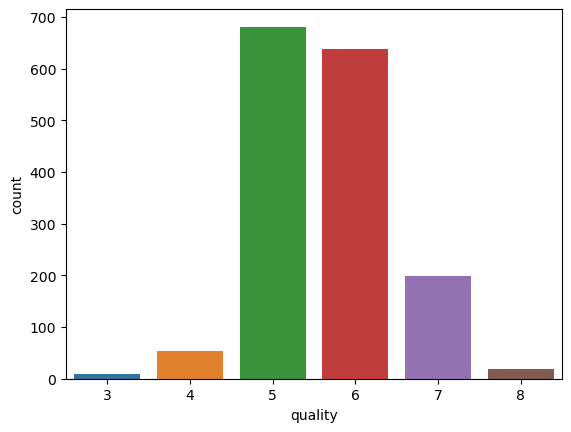

In [8]:
a=data['quality'].value_counts()
sns.countplot(x=data['quality'])

# GRAPHICAL ANALYSIS OF FEATURES (UNIVARITE ANALYSIS)

DETERMINIG THE FREQUENCY DISTRIBUTION OF EACH FEATURE TO FIND THE RANGE.

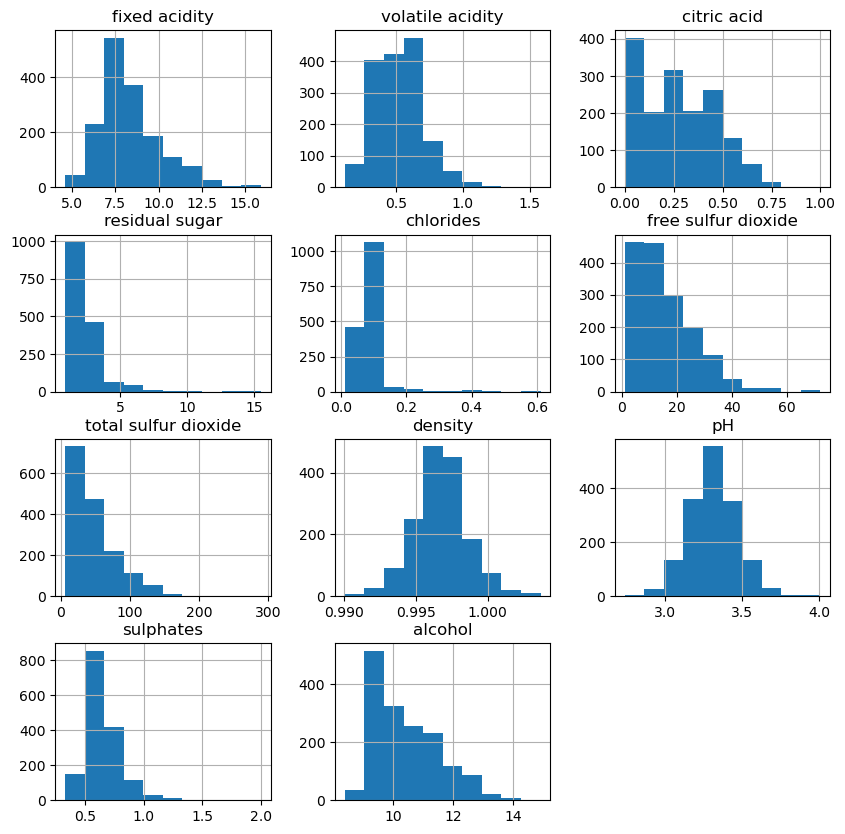

In [9]:
data.drop('quality',axis=1).hist(figsize=(10,10))
plt.show()

DETERMINING THE OUTLIERS IN THE GIVEN FEATURES.

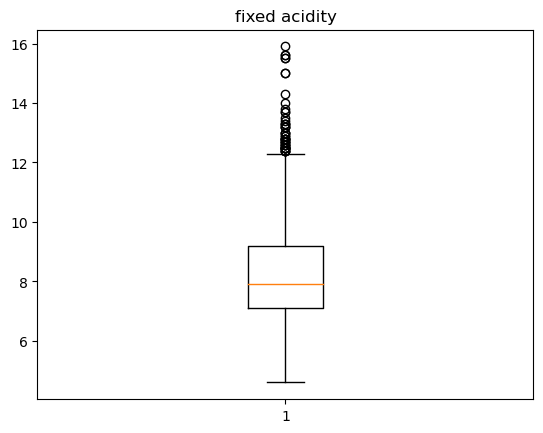

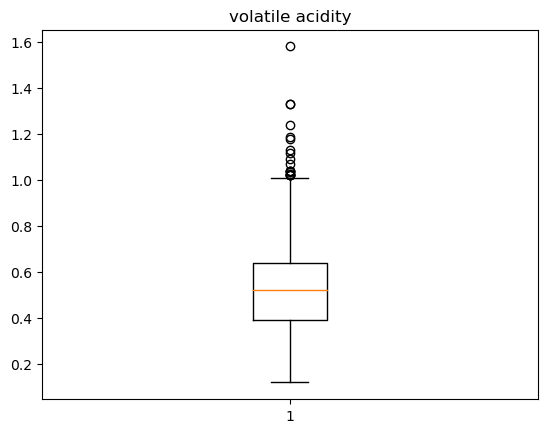

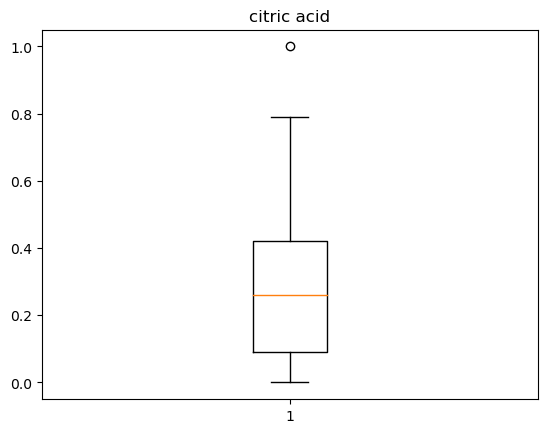

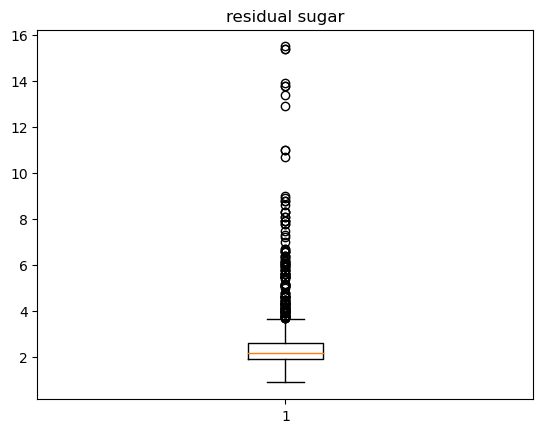

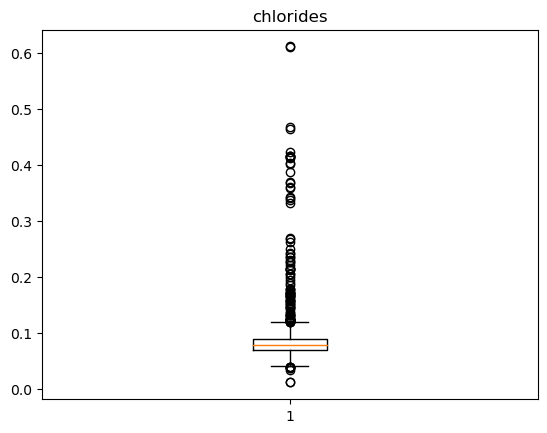

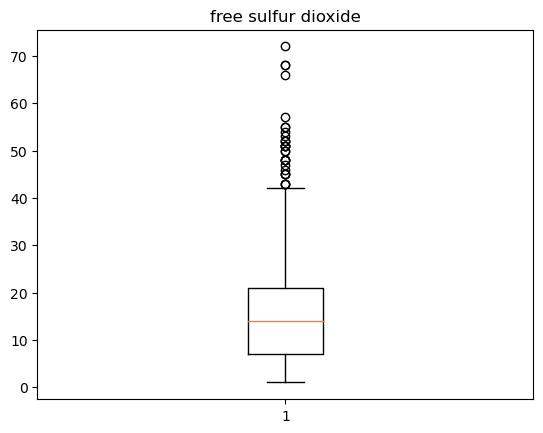

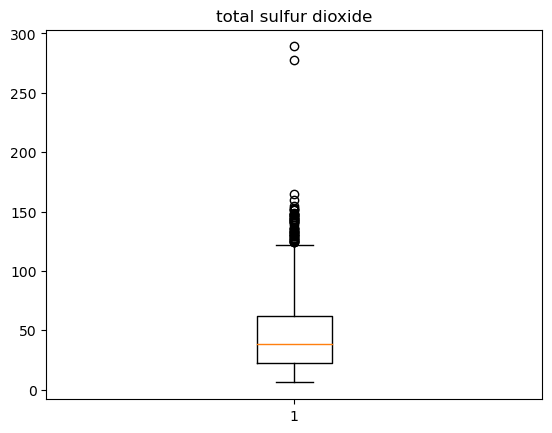

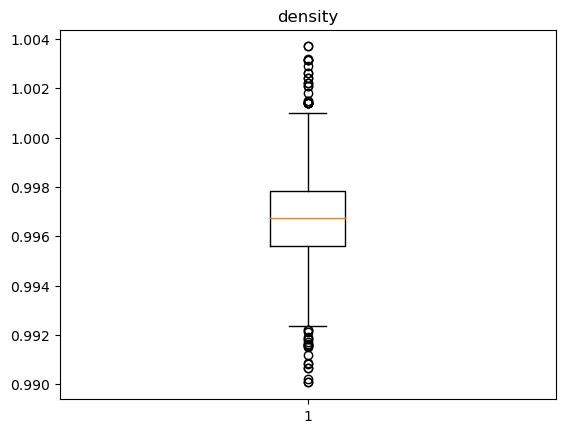

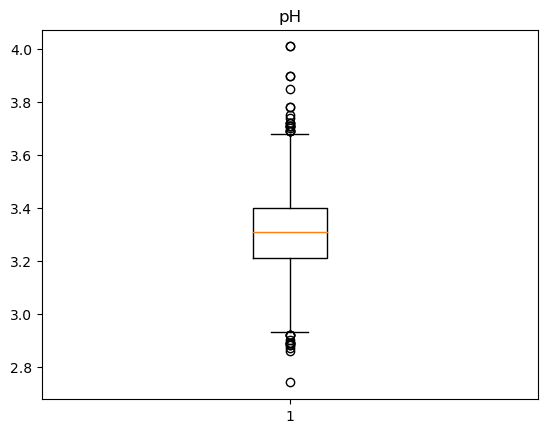

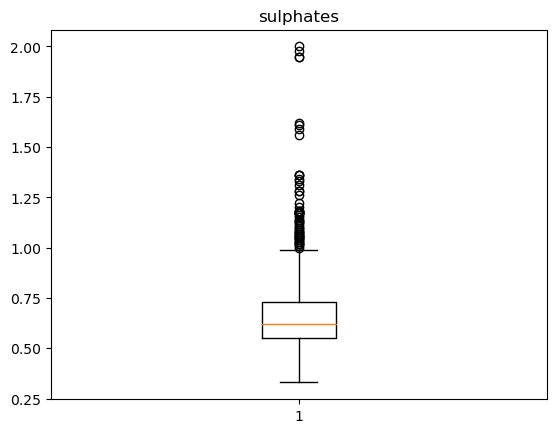

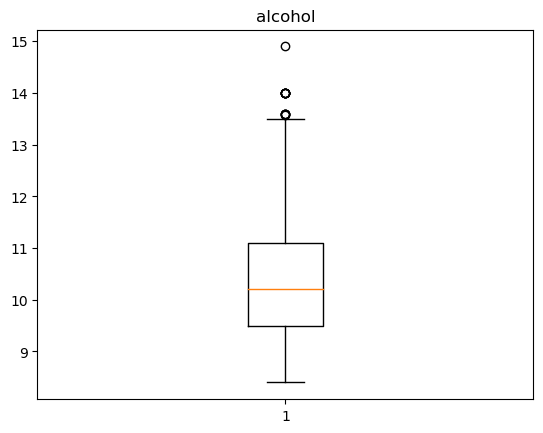

<Figure size 640x480 with 0 Axes>

In [10]:
for columns in data.drop('quality',axis=1).columns.tolist():
    plt.boxplot(data[columns])
    plt.title(columns)
    plt.savefig('image.pdf')
    plt.figure()

# SINCE OUTLIER ARE PRESENT IN ALMOST ALL FEATURES SO LET'S GO FURTHER FOR Z-SCORE CALCULATION FOR MATHIMATICAL INTERPRETATION.

In [11]:
zscore=np.abs(stats.zscore(data.drop('quality',axis=1)))
z=np.array(zscore)

In [12]:
zscore

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.528360          0.961877     1.391472        0.453218   0.243707   
1          0.298547          1.967442     1.391472        0.043416   0.223875   
2          0.298547          1.297065     1.186070        0.169427   0.096353   
3          1.654856          1.384443     1.484154        0.453218   0.264960   
4          0.528360          0.961877     1.391472        0.453218   0.243707   
...             ...               ...          ...             ...        ...   
1594       1.217796          0.403229     0.980669        0.382271   0.053845   
1595       1.390155          0.123905     0.877968        0.240375   0.541259   
1596       1.160343          0.099554     0.723916        0.169427   0.243707   
1597       1.390155          0.654620     0.775267        0.382271   0.264960   
1598       1.332702          1.216849     1.021999        0.752894   0.434990   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0                0.466240              0.379145  0.558274  1.288643   
1                0.872555              0.624333  0.028261  0.719933   
2                0.083727              0.229023  0.134264  0.331177   
3                0.107529              0.411474  0.664277  0.979104   
4                0.466240              0.379145  0.558274  1.288643   
...                   ...                   ...       ...       ...   
1594             1.541953              0.075061  0.978765  0.899886   
1595             2.211351              0.137798  0.862162  1.353436   
1596             1.255068              0.196694  0.533554  0.705508   
1597             1.541953              0.075061  0.676657  1.677400   
1598             0.203158              0.135878  0.666057  0.511130   

      sulphates   alcohol  
0      0.579207  0.960246  
1      0.128950  0.584777  
2      0.048089  0.584777  
3      0.461180  0.584777  
4      0.579207  0.960246  
...         ...       ...  
1594   0.461180  0.072294  
1595   0.601055  0.729364  
1596   0.542042  0.541630  
1597   0.305990  0.209308  
1598   0.010924  0.541630  

[1599 rows x 11 columns]

In [13]:
x,y=np.where(zscore>3)


In [14]:
for i in range(0,len(x)):
    print(z[x[i]][y[i]])

5.32210116796055
3.4545177823932183
3.3588895440045134
3.087414699211392
5.96238012134068
3.66973501473579
5.388529628826326
5.790187383944274
3.364061597051279
5.197246131321542
3.1976303995287156
3.815561378723146
3.2632613056158086
8.002737428058381
3.66973501473579
6.663752945524891
7.623611167095035
3.3156565533304843
7.623611167095035
7.80065039779769
3.4915974733368325
8.06649859389331
3.846774245438443
3.2394567845965505
3.0288730027527917
4.4813569113795735
4.4813569113795735
3.357647345438221
3.357647345438221
3.15688882460384
3.743573931527866
11.105780832024887
3.700401226239349
7.918676551599458
3.3779624193624675
3.307014626286532
5.792350345780871
5.499140398663203
3.879515370733026
3.140602534185621
5.303514741046422
5.617166552464972
3.7307393171181937
3.8380717691257193
3.8380717691257193
11.127034553969864
3.5517088609340215
3.165119040134661
5.749842901890919
5.431037072716278
6.003030763172082
6.003030763172082
4.141839629942865
3.0796042457269466
3.148635235306977

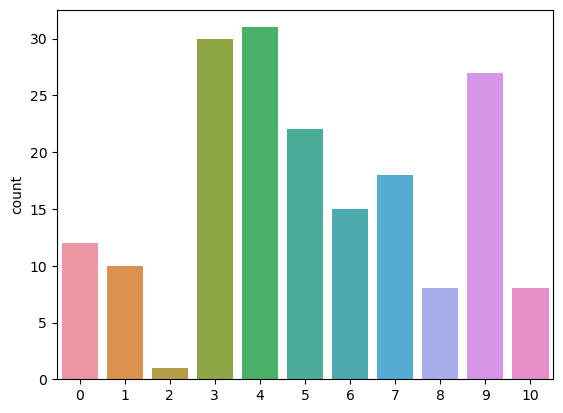

In [15]:
sns.countplot(x=y)
a=[x for x in data.drop('quality',axis=1).columns.tolist()]


# GRAPHICAL ANALYSIS (BIVARAITE ANALYSIS)

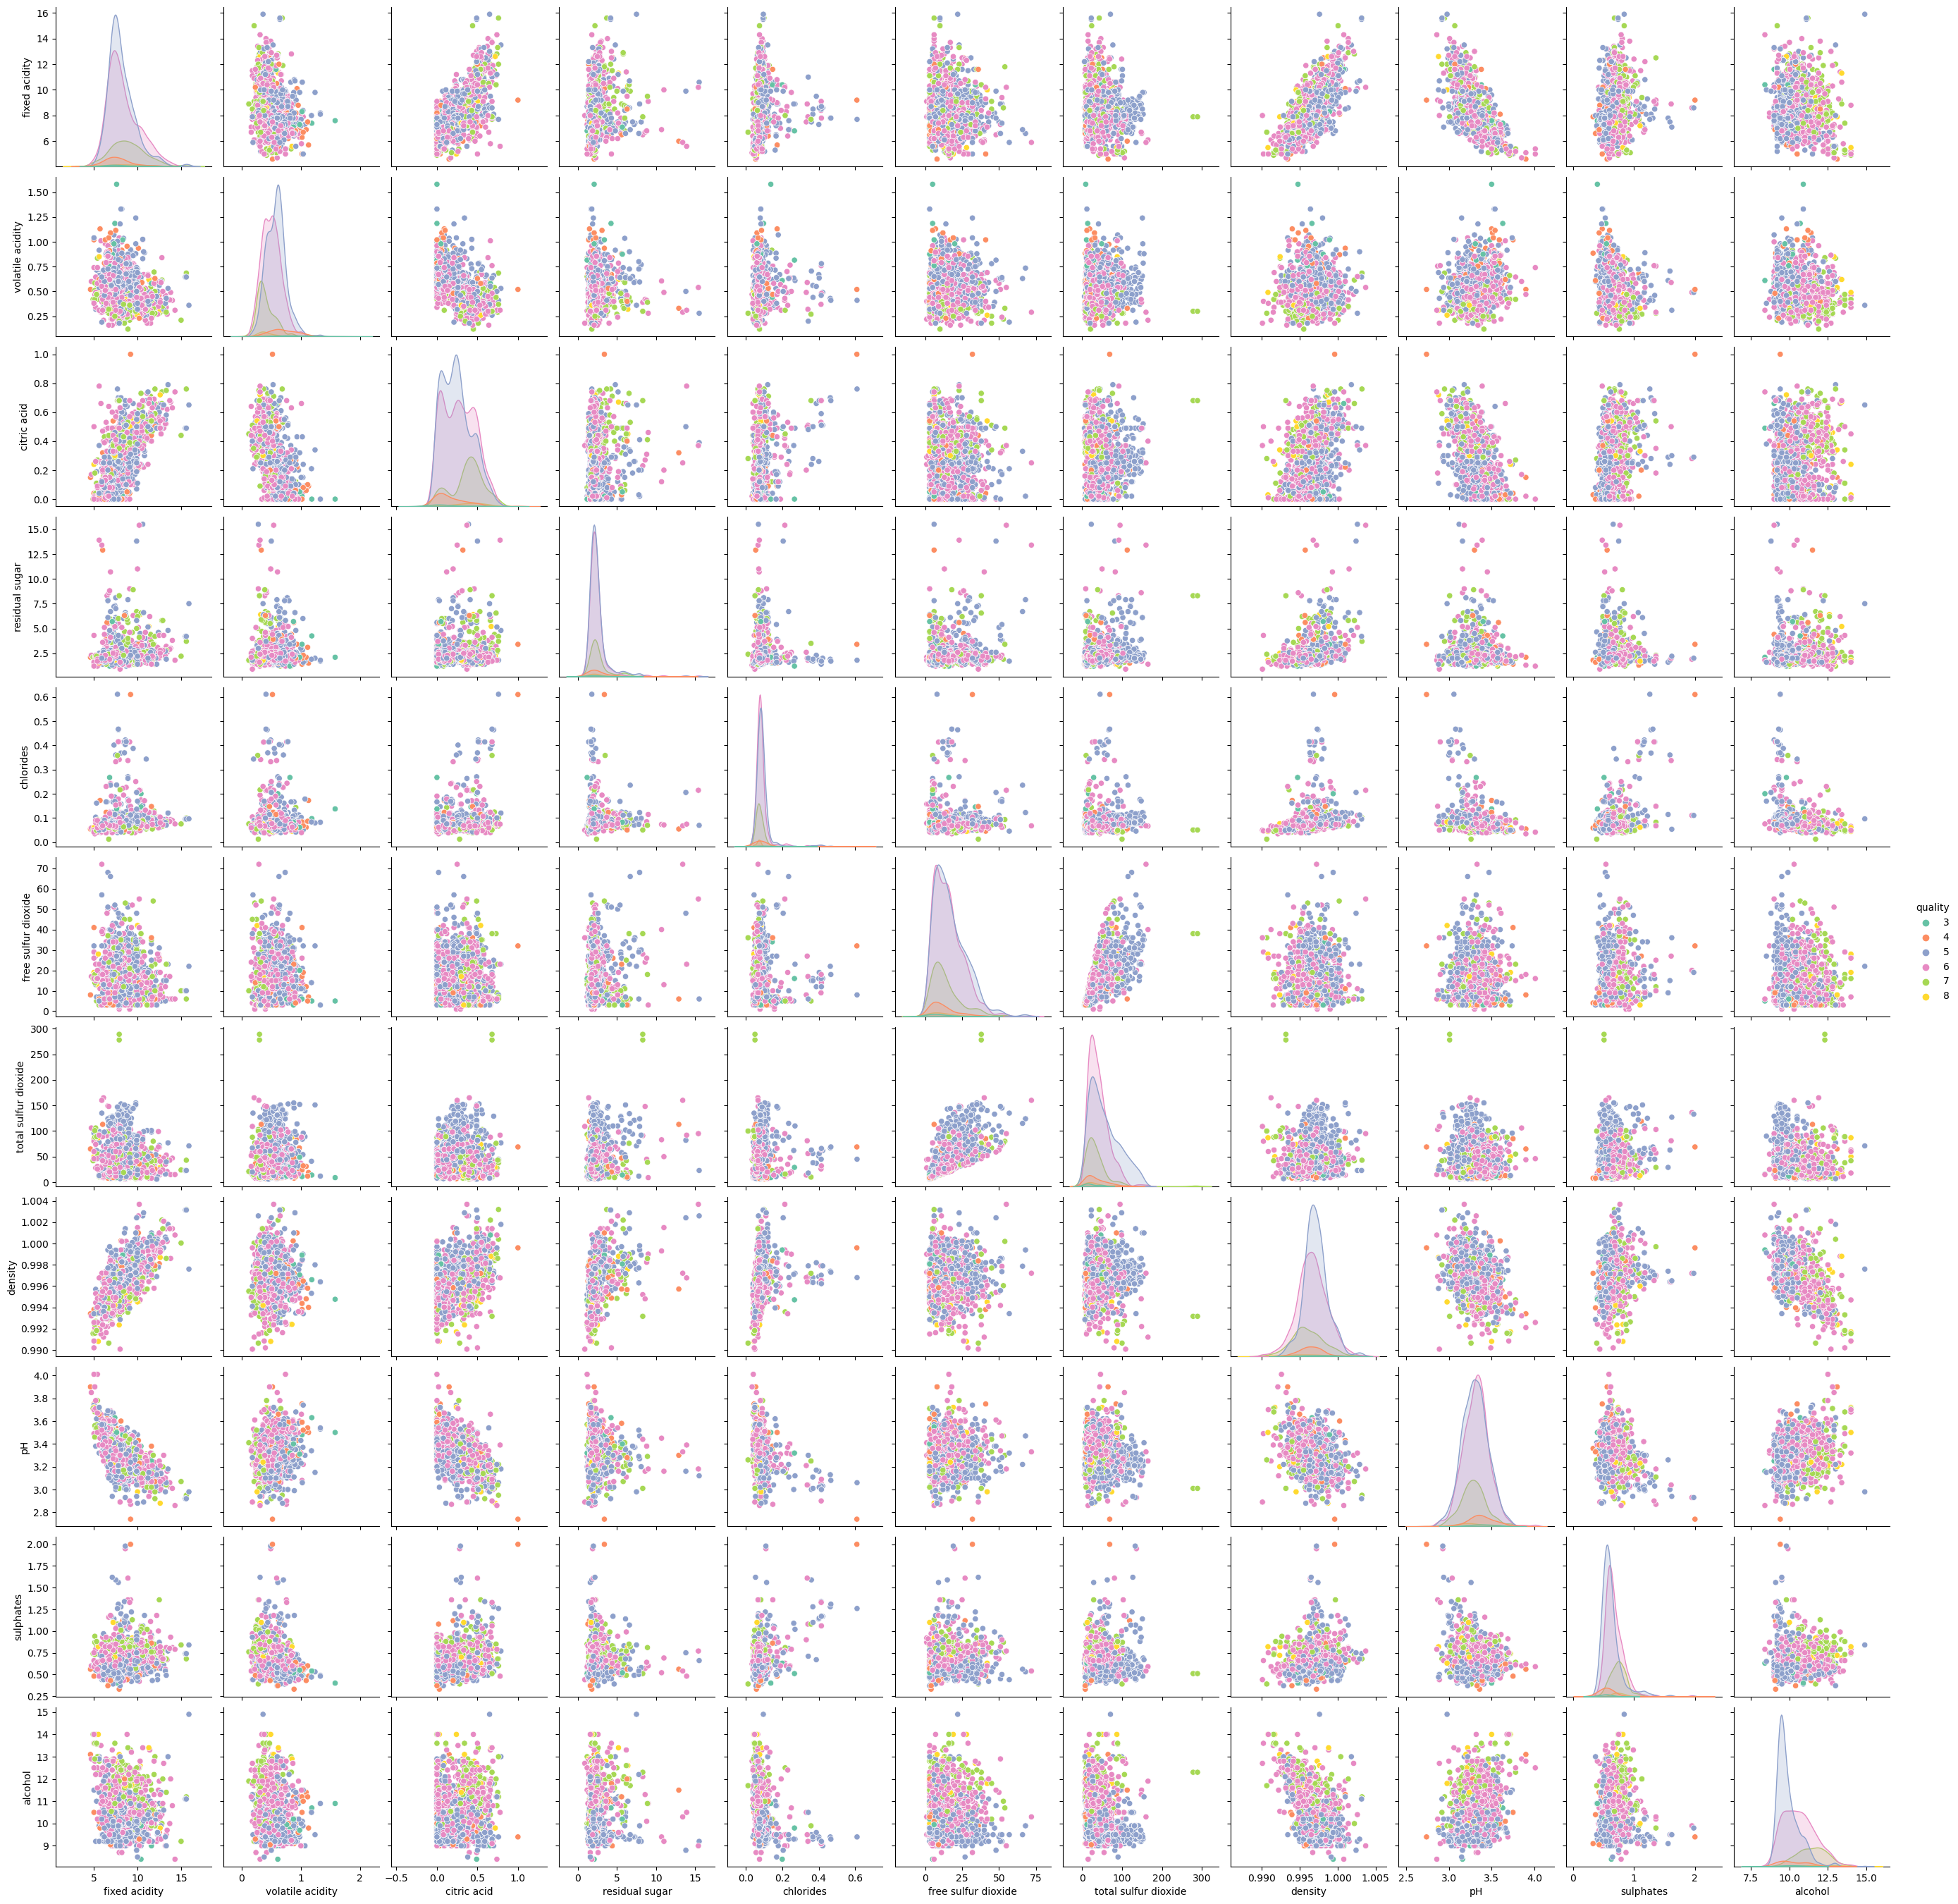

In [16]:
sns.pairplot(data,kind='scatter',hue='quality',palette='Set2')

# GRAPHICAL ANALYSIS MULTIVARIATE

In [17]:
# CREATING A COREALATION MATRIX.
corelational_matrix=data.corr()

corelational_matrix

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153791         -0.010487    -0.060885   
total sulfur dioxide      -0.113198          0.076479     0.035506   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153791   
volatile acidity            0.001918   0.061298            -0.010487   
citric acid                 0.143577   0.203823            -0.060885   
residual sugar              1.000000   0.055610             0.187310   
chlorides                   0.055610   1.000000             0.005627   
free sulfur dioxide         0.187310   0.005627             1.000000   
total sulfur dioxide        0.203048   0.047402             0.668025   
density                     0.355283   0.200632            -0.021981   
pH                         -0.085652  -0.265026             0.070288   
sulphates                   0.005527   0.371260             0.051606   
alcohol                     0.042075  -0.221141            -0.069346   
quality                     0.013732  -0.128907            -0.050554   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113198  0.668047 -0.682978   0.183006   
volatile acidity                  0.076479  0.022026  0.234937  -0.260987   
citric acid                       0.035506  0.364947 -0.541904   0.312770   
residual sugar                    0.203048  0.355283 -0.085652   0.005527   
chlorides                         0.047402  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.668025 -0.021981  0.070288   0.051606   
total sulfur dioxide              1.000000  0.071256 -0.066507   0.042923   
density                           0.071256  1.000000 -0.341699   0.148506   
pH                               -0.066507 -0.341699  1.000000  -0.196648   
sulphates                         0.042923  0.148506 -0.196648   1.000000   
alcohol                          -0.205667 -0.496180  0.205633   0.093595   
quality                          -0.185112 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069346 -0.050554  
total sulfur dioxide -0.205667 -0.185112  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

<Axes: >

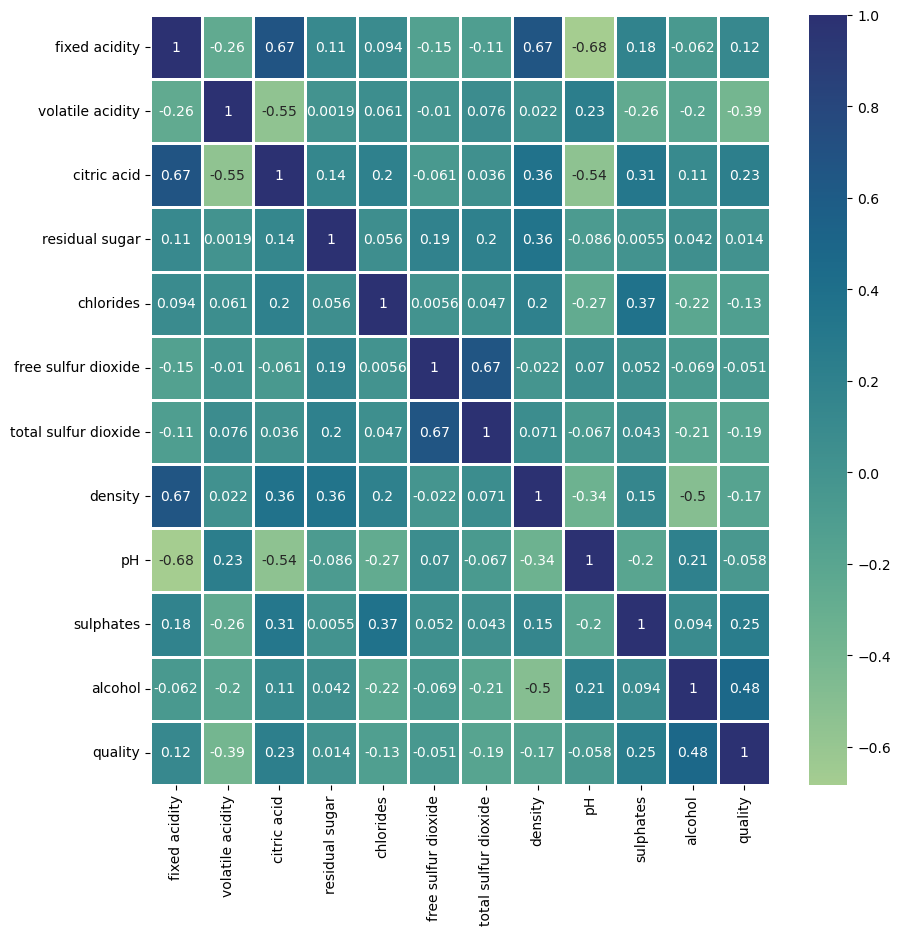

In [18]:
plt.subplots(figsize=(10,10))
sns.heatmap(corelational_matrix,annot=True,linewidth=0.9,cmap='crest')